In [1]:
import numpy as np
import pandas as pd

In [3]:
reviews_train = pd.read_csv('movie_review_train.csv')
reviews_train

,class,text
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...
...,...,...
1595,Neg,if anything stigmata should be taken as...
1596,Neg,john boorman s zardoz is a goofy cinemati...
1597,Neg,the kids in the hall are an acquired taste ...
1598,Neg,there was a time when john carpenter was a gr...


In [4]:
reviews_train['class'] = reviews_train['class'].map({"Pos":1, "Neg": 0})

In [5]:
reviews_train

,class,text
0,1,a common complaint amongst film critics is ...
1,1,whew this film oozes energy the kind of b...
2,1,steven spielberg s amistad which is bas...
3,1,he has spent his entire life in an awful litt...
4,1,being that it is a foreign language film with...
...,...,...
1595,0,if anything stigmata should be taken as...
1596,0,john boorman s zardoz is a goofy cinemati...
1597,0,the kids in the hall are an acquired taste ...
1598,0,there was a time when john carpenter was a gr...


In [9]:
X_train = reviews_train['text']
y_train = reviews_train['class']

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

## fitting into vector
vect.fit(X_train)

## get vocabulary
vect.vocabulary_

print(len(vect.vocabulary_.keys()))

35858


## Q.
Graded Question
What is the size of vocabulary after removing the stop words? Note that the vocabulary size depends only on the training set.

In [14]:
print(len(vect.vocabulary_.keys()))

35858


## Q.
- Suppose we don't want to consider those (rare) words which have appeared only in 3% of the documents, or say those (extremely common ones) which have appeared in 80% of the documents.

- Use CountVectorizer(stop_words='english', min_df=.03, max_df=.8) to create a new vocabulary from the training set. What is the size of the new vocabulary?

In [22]:
vect = CountVectorizer(stop_words='english', min_df=.03, max_df=.8)
vect.fit(X_train)
vect.vocabulary_
print(len(vect.vocabulary_.keys()))

1643


## Q.
- Suppose we build the vocabulary from the training data using CountVectorizer(stop_words='english', min_df=.03, max_df=.8) and then transform the test data using CountVectorizer(). How many nonzero entries are there in the sparse matrix (corresponding to the test data)? 

- Note: Test data is provided in a separate CSV file.

In [18]:
reviews_test = pd.read_csv('movie_review_test.csv')
reviews_test.head()
reviews_test.shape

(400, 2)

In [17]:
X_test = reviews_test['text']
y_test = reviews_test['class']

In [19]:
X_test.shape

(400,)

In [20]:
y_test.shape

(400,)

## transform the test data

In [26]:
X_test_transformed = vect.transform(X_test)
print(X_test_transformed.shape)

(400, 1643)


In [29]:
print(X_test_transformed.toarray)

<bound method _cs_matrix.toarray of <400x1643 sparse matrix of type '<class 'numpy.int64'>'
	with 51663 stored elements in Compressed Sparse Row format>>


## Q.
- Train a Bernoulli Naive Bayes model on the training set and predict the classes of the test set. Each movie review in the test set has been labelled as 'Pos' or 'Neg'. What is the accuracy of the model?

- Note - Dictionary should be prepared using CountVectorizer(stop_words='english', min_df=.03, max_df=.8)

In [33]:
## read train data
reviews_train = pd.read_csv('movie_review_train.csv')

## map the class column with 1 and 0
reviews_train['class'] = reviews_train['class'].map({"Pos":1, "Neg": 0})

## Get X and y
X_train = reviews_train['text']
y_train = reviews_train['class']



## Creating Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english', min_df=.03, max_df=.8)
vect.fit(X_train)


## Transform train and test data
X_train_transformed = vect.transform(X_train)


## Building Bernoulli Model
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

# fit 
bnb.fit(X_train_transformed, y_train)





BernoulliNB()

In [32]:
### Test set 
reviews_test = pd.read_csv('movie_review_test.csv')
reviews_test['class'] = reviews_test['class'].map({"Pos":1, "Neg": 0})

## Get X and y
X_test = reviews_test['text']
y_test = reviews_test['class']

## Transform test data
X_test_transformed = vect.transform(X_test)


In [36]:
## Predict class
y_pred_class = bnb.predict(X_test_transformed)

In [38]:
# predict probability
y_pred_proba =bnb.predict_proba(X_test_transformed)

# accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.79

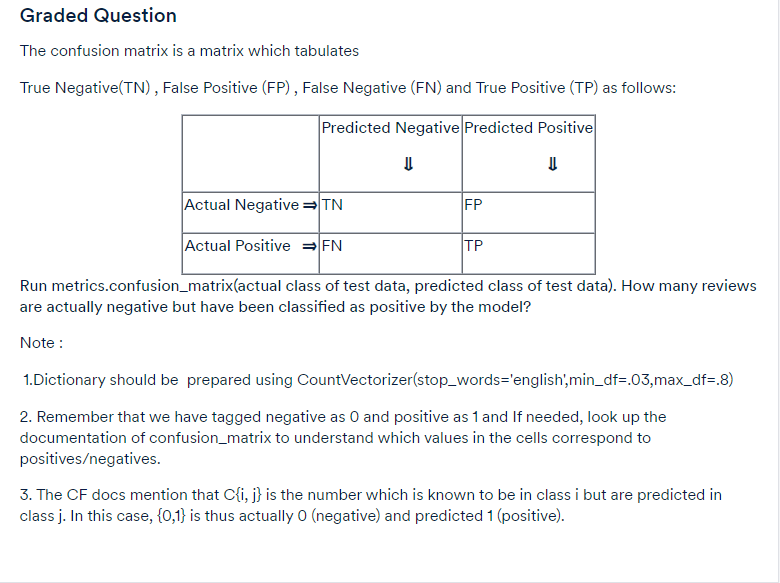

In [39]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[177,  23],
       [ 61, 139]], dtype=int64)

In [40]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

print('TN - ', TN)
print('FP - ', FP)
print('FN - ', FN)
print('TP - ', TP)

[[177  23]
 [ 61 139]]
TN -  177
FP -  23
FN -  61
TP -  139


In [41]:
print('FP - ', FP)

FP -  23
